In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("white")

### Function to generate data from one distribution

In [2]:
def gen_data(n_sample=50,dist='uniform',random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample)
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,scale=1+random_var,size=n_sample)
    if dist=='binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample)
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)
    if dist=='chisquare':
        d=np.random.chisquare(df=3+int(5*random_var),size=n_sample)
    if dist=='gamma':
        d=np.random.gamma(shape=1.0+random_var,scale=0.5+random_var,size=n_sample)
    if dist=='beta':
        d=np.random.beta(a=0.5+random_var,b=1.0+random_var,size=n_sample)
    if dist=='triangular':
        d=np.random.triangular(left=0.0,mode=np.min([0.5+random_var,1.0]),right=1.0,size=n_sample)
    if dist=='lognormal':
        d=np.random.lognormal(mean=1-random_var,sigma=1+random_var,size=n_sample)
    if dist=='laplace':
        d=np.random.laplace(scale=0.5+random_var,size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

In [ ]:
for r in [0.1,0.2,0.3,0.4,0.5]:
    test=gen_data(dist='beta',random_var=r)+gen_data(dist='exponential',random_var=r)
    sns.kdeplot(test,lw=2,c=np.random.choice(['k','orange','blue','green','red']))
    plt.grid(True)
plt.show()

In [ ]:
dist_list=['uniform','normal','binomial','exponential','poisson','chisquare','gamma','beta','triangular','lognormal','laplace']

In [ ]:
for d in dist_list:
    data = gen_data(n_sample=1000,dist=d)
    plt.title(f"Plot of {d}",fontsize=15)
    sns.kdeplot(data,lw=3,c='k')
    plt.grid(True)
    plt.show()

### Function to generate histograms and write to a DataFrame

In [3]:
def gen_dist_df(n_input=5,n_sample=200,bins=10):
    """
    Generates randomized data sets calling gen_data with various distributions and put them in a DataFrame
    """
    import pandas as pd
    
    df_data={}
    df_data['Data']=[]
    df_data['Histogram']=[]
    df_data['Type']=[]
    df_data['TypeNum']=[]
    dist_list=['uniform','normal','binomial','exponential','poisson','chisquare',\
               'gamma','beta','triangular','lognormal','laplace']
    for i in range(n_input):
        r=np.random.random()
        dist=np.random.choice(dist_list)
        dist_num=dist_list.index(dist)+1
        d=gen_data(n_sample=n_sample,dist=dist,random_var=r)
        d=d.reshape(n_sample,)
        df_data['Data'].append(d)
        # Add histogram bin array after range scaling
        hist=np.histogram(d,bins=bins)[0]
        bins=len(hist)
        hist=(hist-hist.min())/(hist.max()-hist.min())
        # Reshape for proper input dimension to the NN
        hist=hist.reshape(bins,)
        df_data['Histogram'].append(hist)
        df_data['Type'].append(dist)
        df_data['TypeNum'].append(dist_num)
        
    df_data=pd.DataFrame(df_data)
        
    return df_data

In [4]:
n_input=100
n_sample=100
n_bins=10

In [5]:
df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=n_bins)

In [6]:
df.head()

,Data,Histogram,Type,TypeNum
0,"[0.6427368222687841, 0.7483650606240564, 0.679...","[0.7692307692307693, 1.0, 0.8461538461538461, ...",beta,8
1,"[1.0, 1.2857142857142858, 1.2857142857142858, ...","[0.08, 0.2, 0.68, 0.0, 0.92, 1.0, 0.0, 0.8, 0....",binomial,3
2,"[0.4, 0.2, 0.2, 0.2, 0.0, 0.6, 0.8, 0.4, 0.6, ...","[0.4594594594594595, 0.0, 1.0, 0.0, 0.64864864...",poisson,5
3,"[0.35753346975730266, 0.39521414539390387, 0.3...","[0.05555555555555555, 0.0, 0.16666666666666666...",triangular,9
4,"[1.1428571428571428, 1.4285714285714286, 1.0, ...","[0.03571428571428571, 0.17857142857142858, 0.4...",binomial,3


## Logistic regression

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
n_input=500
n_sample=100
n_bins=10

### Function to run simple logistic regression - returns the test score

In [9]:
def run_logreg(n_input=200,n_sample=100,bins=10,test_frac=0.2):
    """
    """
    from sklearn import linear_model
    from sklearn.model_selection import train_test_split
    
    logreg=linear_model.LogisticRegression(C=1e5)
    df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=bins)
    X=[]
    for i in range(n_input):
        X.append(df['Histogram'][i])
    X=np.array(X)
    y=df['TypeNum']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
    logreg.fit(X_train,y_train)
    score=logreg.score(X_test,y_test)
    
    return score

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:07<00:00,  5.93it/s]


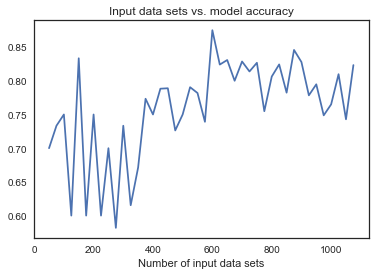

In [12]:
from tqdm import tqdm
logmodel_scores=[]
inputs=[]
for i in tqdm(range(50,1100,25)):
    logmodel_scores.append(run_logreg(n_input=i,n_sample=500))
    inputs.append(i)
plt.plot(inputs,logmodel_scores)
plt.title("Input data sets vs. model accuracy")
plt.xlabel("Number of input data sets")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:06<00:00,  6.22it/s]


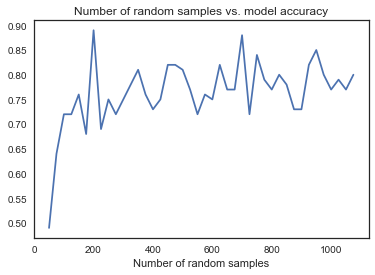

In [13]:
from tqdm import tqdm
logmodel_scores=[]
samples=[]
for i in tqdm(range(50,1100,25)):
    logmodel_scores.append(run_logreg(n_input=500,n_sample=i))
    samples.append(i)
plt.plot(samples,logmodel_scores)
plt.title("Number of random samples vs. model accuracy")
plt.xlabel("Number of random samples")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  5.26it/s]


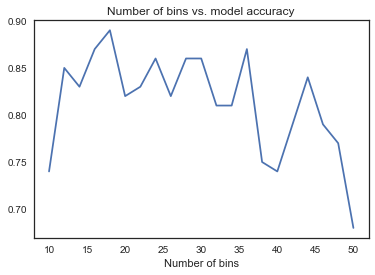

In [14]:
from tqdm import tqdm
logmodel_scores=[]
bins=[]
for i in tqdm(range(10,52,2)):
    logmodel_scores.append(run_logreg(n_input=500,n_sample=500,bins=i))
    bins.append(i)
plt.plot(bins,logmodel_scores)
plt.title("Number of bins vs. model accuracy")
plt.xlabel("Number of bins")
plt.show()

## Neural Network

In [15]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

c:\users\tirtha\python\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
n_input=500
n_sample=100
n_bins=10

### Function to prepare the input - generate train and test splits and validation set

In [17]:
def prepare_NN_input(df,test_frac=0.2,val_frac=0.5):
    """
    """
    
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    
    n_input=df.shape[0]
    y=df['Type']
    num_classes = len(df['Type'].unique())
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)
    y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)
    
    X=[]
    for i in range(n_input):
        X.append(df['Histogram'][i])
    X=np.array(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_frac)
    input_dim=X.shape[1]
    
    return (X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes)

### Function to construct the model

In [18]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

### Function to run the model

In [25]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=200,batch_size=16,plot_loss=False):
    # save best model as checkpointer
    #checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, save_best_only=True)
    
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val), 
              verbose=0, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['val_acc'],color='k')
        plt.title("Validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.show()
    
    return hist

### Function to test the model performance

In [26]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [03:13<00:00,  9.23s/it]


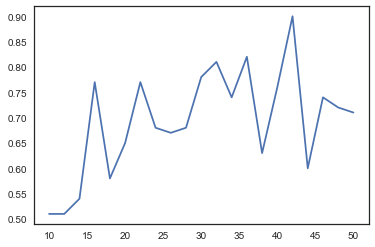

In [27]:
from tqdm import tqdm
nnmodel_scores=[]
bins=[]
loop=0
for i in tqdm(range(10,52,2)):
    df=gen_dist_df(n_input=500,n_sample=500,bins=i)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_NN_input(df)
    model=make_NN_model(input_dim=input_dim, num_classes=num_classes)
    hist=run_NN(model=model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val)
    score=test_NN(hist=hist,X_test=X_test,y_test=y_test)
    nnmodel_scores.append(score)
    loop+=1
    bins.append(i)
    #print(f"Finished {loop} run")

print()
plt.plot(bins,nnmodel_scores)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [09:22<00:00, 13.40s/it]


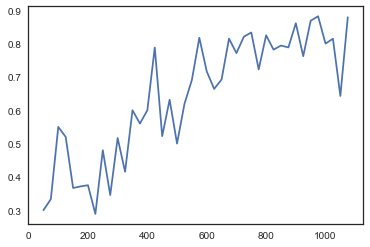

In [28]:
from tqdm import tqdm
nnmodel_scores=[]
inputs=[]
loop=0
for i in tqdm(range(50,1100,25)):
    df=gen_dist_df(n_input=i,n_sample=500,bins=20)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_NN_input(df)
    model=make_NN_model(input_dim=input_dim, num_classes=num_classes)
    hist=run_NN(model=model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val)
    score=test_NN(hist=hist,X_test=X_test,y_test=y_test)
    nnmodel_scores.append(score)
    loop+=1
    inputs.append(i)
    #print(f"Finished {loop} run")

print()
plt.plot(inputs,nnmodel_scores)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [15:07<00:00, 21.60s/it]


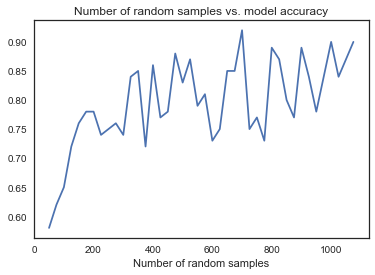

In [30]:
from tqdm import tqdm
nnmodel_scores=[]
samples=[]
loop=0
for i in tqdm(range(50,1100,25)):
    df=gen_dist_df(n_input=500,n_sample=i,bins=20)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_NN_input(df)
    model=make_NN_model(input_dim=input_dim, num_classes=num_classes,neuron_layer_1=40,neuron_layer_2=20)
    hist=run_NN(model=model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val)
    score=test_NN(hist=hist,X_test=X_test,y_test=y_test)
    nnmodel_scores.append(score)
    loop+=1
    samples.append(i)
    #print(f"Finished {loop} run")

print()
plt.plot(samples,nnmodel_scores)
plt.title("Number of random samples vs. model accuracy")
plt.xlabel("Number of random samples")
plt.show()